## Data Engineering Capstone Project

### Project Summary

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

In [2]:
!pip install pandas
!pip install seaborn

  Using cached pandas-1.1.5-cp36-cp36m-manylinux1_x86_64.whl (9.5 MB)
  Using cached numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl (14.8 MB)
  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
  Using cached matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl (11.5 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
  Using cached Pillow-8.2.0-cp36-cp36m-manylinux1_x86_64.whl (3.0 MB)


In [3]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import configparser
from pyspark.sql import SparkSession
# from sas7bdat import SAS7BDAT

### Scope
## TODO : Change use-case before uploading
#### The objective of this project is to develop a cloud data warehouse solution that will provide decision and policy makers with an analytics database for immigration and toursim related data. A use-case of this analytics database is to power dashboards and visualizations that assist organisations such as the National Travel & Tourism Office (NTTO) in it's quest to create a positive climate for growth in travel and tourism through reducing institutional barriers to tourism.

#### The technology used in this project is Amazon S3, Amazon Redshift, Apache Spark and Apache Airflow. Data will be read and staged from the customers repository to S3 using Spark. Scheduled monthly jobs will be run using Apache Airflow to populate a data warehouse on RedShift.

#### I94 Immigration Data: 
---

This data comes from the US National Tourism and Trade Office. In the past all foreign visitors to the U.S. arriving via air or sea were required to complete paper Customs and Border Protection Form I-94 Arrival/Departure Record or Form I-94W Nonimmigrant Visa Waiver Arrival/Departure Record and this dataset comes from this forms. 

This dataset forms the core of the data warehouse and the customer repository has a years worth of data for the year 2016 and the dataset is divided by month. For this project the data is in a folder located at ../../data/18-83510-I94-Data-2016/. Each months data is stored in an SAS binary database storage format <i>sas7bdat</i>. For this project we have chosen going to work with data for the month of April. However, the data extraction, transformation and loading utility functions have been designed to work with any month's worth of data.

<b><i>Data dictionary</i></b>

<table class="tg" align="left">
  <tr>
    <th class="tg-0pky">Feature</th>
    <th class="tg-0pky">Description</th>
  </tr>
 <tr><td class="tg-0pky">cicid</td><td class="tg-0pky">Unique record ID</td>
 <tr><td class="tg-0pky">i94yr</td><td class="tg-0pky">4 digit year</td>
 <tr><td class="tg-0pky">i94mon</td><td class="tg-0pky">Numeric month</td>
 <tr><td class="tg-0pky">i94cit</td><td class="tg-0pky">3 digit code for immigrant country of birth</td>
 <tr><td class="tg-0pky">i94res</td><td class="tg-0pky">3 digit code for immigrant country of residence </td>
 <tr><td class="tg-0pky">i94port</td><td class="tg-0pky">Port of admission</td>
 <tr><td class="tg-0pky">arrdate</td><td class="tg-0pky">Arrival Date in the USA</td>
 <tr><td class="tg-0pky">i94mode</td><td class="tg-0pky">Mode of transportation (1 = Air; 2 = Sea; 3 = Land; 9 = Not reported)</td>
 <tr><td class="tg-0pky">i94addr</td><td class="tg-0pky">USA State of arrival</td>
 <tr><td class="tg-0pky">depdate</td><td class="tg-0pky">Departure Date from the USA</td>
 <tr><td class="tg-0pky">i94bir</td><td class="tg-0pky">Age of Respondent in Years</td>
 <tr><td class="tg-0pky">i94visa</td><td class="tg-0pky">Visa codes collapsed into three categories</td>
 <tr><td class="tg-0pky">count</td><td class="tg-0pky">Field used for summary statistics</td>
 <tr><td class="tg-0pky">dtadfile</td><td class="tg-0pky">Character Date Field - Date added to I-94 Files</td>
 <tr><td class="tg-0pky">visapost</td><td class="tg-0pky">Department of State where where Visa was issued </td>
 <tr><td class="tg-0pky">occup</td><td class="tg-0pky">Occupation that will be performed in U.S</td>
 <tr><td class="tg-0pky">entdepa</td><td class="tg-0pky">Arrival Flag - admitted or paroled into the U.S.</td>
 <tr><td class="tg-0pky">entdepd</td><td class="tg-0pky">Departure Flag - Departed, lost I-94 or is deceased</td>
 <tr><td class="tg-0pky">entdepu</td><td class="tg-0pky">Update Flag - Either apprehended, overstayed, adjusted to perm residence</td>
 <tr><td class="tg-0pky">matflag</td><td class="tg-0pky">Match flag - Match of arrival and departure records</td>
 <tr><td class="tg-0pky">biryear</td><td class="tg-0pky">4 digit year of birth</td>
 <tr><td class="tg-0pky">dtaddto</td><td class="tg-0pky">Character Date Field - Date to which admitted to U.S. (allowed to stay until)</td>
 <tr><td class="tg-0pky">gender</td><td class="tg-0pky">Non-immigrant sex</td>
 <tr><td class="tg-0pky">insnum</td><td class="tg-0pky">INS number</td>
 <tr><td class="tg-0pky">airline</td><td class="tg-0pky">Airline used to arrive in U.S.</td>
 <tr><td class="tg-0pky">admnum</td><td class="tg-0pky">Admission Number</td>
 <tr><td class="tg-0pky">fltno</td><td class="tg-0pky">Flight number of Airline used to arrive in U.S.</td>
 <tr><td class="tg-0pky">visatype</td><td class="tg-0pky">Class of admission legally admitting the non-immigrant to temporarily stay in U.S.</td>
</table>

In [13]:
# or we can read the sasbat files given alternatively
spark = SparkSession.builder.appName("Spark_Immigration")\
                .config("spark.jars.packages","saurfang:spark-sas7bdat:3.0.0-s_2.11	")\
                .getOrCreate()

In [ ]:
df_spark =spark.read.format('com.github.saurfang.sas.spark')\
                .load('data/18-83510-I94-Data-2016/i94_feb16_sub.sas7bdat', forceLowercaseNames=True, inferLong=True)
df.write.csv("newcars.csv", header=True)

### Aborted this approach for setup issues, will try with new installtion later as I wasted weeks on this unstable library

In [2]:
# Read immigration data files
path_sample="dataset/immigration_data_sample.csv"

path="dataset/data/18-83510-I94-Data-2016/i94_feb16_sub.sas7bdat"
df_im=pd.read_csv(path_sample)
#df_im = pd.read_sas(path, 'sas7bdat', encoding="ISO-8859-1")
df_im.head()

,Unnamed: 0,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,2027561,4084316.0,2016.0,4.0,209.0,209.0,HHW,20566.0,1.0,HI,...,NaN,M,1955.0,07202016,F,NaN,JL,5.658267e+10,00782,WT
1,2171295,4422636.0,2016.0,4.0,582.0,582.0,MCA,20567.0,1.0,TX,...,NaN,M,1990.0,10222016,M,NaN,*GA,9.436200e+10,XBLNG,B2
2,589494,1195600.0,2016.0,4.0,148.0,112.0,OGG,20551.0,1.0,FL,...,NaN,M,1940.0,07052016,M,NaN,LH,5.578047e+10,00464,WT
3,2631158,5291768.0,2016.0,4.0,297.0,297.0,LOS,20572.0,1.0,CA,...,NaN,M,1991.0,10272016,M,NaN,QR,9.478970e+10,00739,B2
4,3032257,985523.0,2016.0,4.0,111.0,111.0,CHM,20550.0,3.0,NY,...,NaN,M,1997.0,07042016,F,NaN,NaN,4.232257e+10,LAND,WT


In [3]:
## Now we will check null data % and basic statistical information from the dataset
df_im.describe()

,Unnamed: 0,cicid,i94yr,i94mon,i94cit,i94res,arrdate,i94mode,depdate,i94bir,i94visa,count,dtadfile,entdepu,biryear,insnum,admnum
count,1.000000e+03,1.000000e+03,1000.0,1000.0,1000.000000,1000.00000,1000.000000,1000.000000,951.000000,1000.000000,1000.000000,1000.0,1.000000e+03,0.0,1000.000000,35.000000,1.000000e+03
mean,1.542097e+06,3.040461e+06,2016.0,4.0,302.928000,298.26200,20559.680000,1.078000,20575.037855,42.382000,1.859000,1.0,2.016042e+07,NaN,1973.618000,3826.857143,6.937237e+10
std,9.152879e+05,1.799818e+06,0.0,0.0,206.485285,202.12039,8.995027,0.485955,24.211234,17.903424,0.386353,0.0,4.951657e+01,NaN,17.903424,221.742583,2.338134e+10
min,1.092500e+04,1.320800e+04,2016.0,4.0,103.000000,103.00000,20545.000000,1.000000,20547.000000,1.000000,1.000000,1.0,2.016040e+07,NaN,1923.000000,3468.000000,0.000000e+00
25%,7.214422e+05,1.412170e+06,2016.0,4.0,135.000000,131.00000,20552.000000,1.000000,20561.000000,30.750000,2.000000,1.0,2.016041e+07,NaN,1961.000000,3668.000000,5.599301e+10
50%,1.494568e+06,2.941176e+06,2016.0,4.0,213.000000,213.00000,20560.000000,1.000000,20570.000000,42.000000,2.000000,1.0,2.016042e+07,NaN,1974.000000,3887.000000,5.931477e+10
75%,2.360901e+06,4.694151e+06,2016.0,4.0,438.000000,438.00000,20567.250000,1.000000,20580.000000,55.000000,2.000000,1.0,2.016042e+07,NaN,1985.250000,3943.000000,9.343623e+10
max,3.095749e+06,6.061994e+06,2016.0,4.0,746.000000,696.00000,20574.000000,9.000000,20715.000000,93.000000,3.000000,1.0,2.016080e+07,NaN,2015.000000,4686.000000,9.502151e+10


In [4]:
# let's check number of missing values per column
print(f"Number of missing values / column")
df_im.isnull().sum()

Number of missing values / column


Unnamed: 0       0
cicid            0
i94yr            0
i94mon           0
i94cit           0
i94res           0
i94port          0
arrdate          0
i94mode          0
i94addr         59
depdate         49
i94bir           0
i94visa          0
count            0
dtadfile         0
visapost       618
occup          996
entdepa          0
entdepd         46
entdepu       1000
matflag         46
biryear          0
dtaddto          0
gender         141
insnum         965
airline         33
admnum           0
fltno            8
visatype         0
dtype: int64

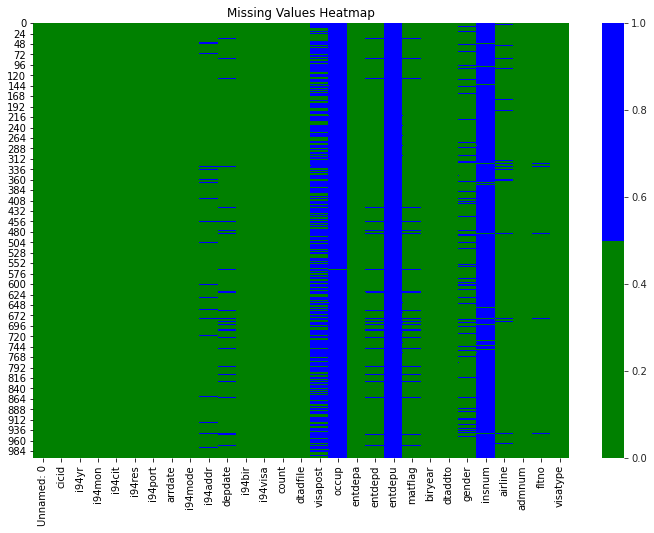

In [5]:
# The heatmap is another good way to see where we are missing the data the most. 
# Blue color marks the NAs in each column.
cols = df_im.columns 
colours = ['g', 'b'] 
f, ax = plt.subplots(figsize = (12,8))
sns.set_style("whitegrid")
plt.title('Missing Values Heatmap', )
sns.heatmap(df_im[cols].isnull(), cmap=sns.color_palette(colours));

#### World Temperature Data: This dataset comes from Kaggle and represents global land temperatures by city.

In [6]:
file_name = 'dataset/GlobalLandTemperaturesByCity.csv'
df_temp = pd.read_csv(file_name)
df_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


<b><i>Data dictionary for World temperature</i></b>

<table class="tg" align="left">
  <tr>
    <th class="tg-0pky">Feature</th>
    <th class="tg-0pky">Description</th>
  </tr>
 <tr><td class="tg-0pky">dt</td><td class="tg-0pky">Date</td>
 <tr><td class="tg-0pky">AverageTemperature</td><td class="tg-0pky">Global average land temperature in celsius</td>
 <tr><td class="tg-0pky">AverageTemperatureUncertainty</td><td class="tg-0pky">95% confidence interval around the average</td>
 <tr><td class="tg-0pky">City</td><td class="tg-0pky">Name of City</td>
 <tr><td class="tg-0pky">Country</td><td class="tg-0pky">Name of Country</td>
 <tr><td class="tg-0pky">Latitude</td><td class="tg-0pky">City Latitude</td>
 <tr><td class="tg-0pky">Longitude</td><td class="tg-0pky">City Longitude</td>
</table>

In [7]:
# let's check number of missing values per column
print(f"Number of missing values / column in dataset of length : {df_temp.shape[0]}")
df_temp.isnull().sum()

Number of missing values / column in dataset of length : 8599212


dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [8]:
# Drop Duplicates based on certain columns
df_temp = df_temp.dropna(subset=[
        "AverageTemperature"
    ])
df_temp.drop_duplicates(subset=['dt', 'City', 'Country'],inplace=True)
print(f"After dropping duplicates, length of dataset : {df_temp.shape[0]}")

After dropping duplicates, length of dataset : 8190783


## Data Description: US City Demographic Data

In [9]:
## EDA : US City Demographic Data
path="dataset/us-cities-demographics.csv"
df_us_dem = pd.read_csv(path,sep=";")
df_us_dem.head()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.60,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129.0,49500.0,93629,4147.0,32935.0,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127.0,87105.0,175232,5821.0,33878.0,3.18,CA,Black or African-American,24437
4,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402


<b><i>Data dictionary for US Demographic data</i></b>

<table class="tg" align="left">
  <tr>
    <th class="tg-0pky">Feature</th>
    <th class="tg-0pky">Datatype</th>
  </tr>
 <tr><td class="tg-0pky">City</td><td class="tg-0pky">varchar(50)</td>
 <tr><td class="tg-0pky">State</td><td class="tg-0pky">varchar(50)</td>
 <tr><td class="tg-0pky">Median Age</td><td class="tg-0pky">float</td>
 <tr><td class="tg-0pky">Male Population</td><td class="tg-0pky">int</td>
 <tr><td class="tg-0pky">Female Population</td><td class="tg-0pky">int</td>
 <tr><td class="tg-0pky">Total Population</td><td class="tg-0pky">int</td>
 <tr><td class="tg-0pky">Number of veterans</td><td class="tg-0pky">int</td>
 <tr><td class="tg-0pky">Foreign-born</td><td class="tg-0pky">int</td>
 <tr><td class="tg-0pky">Average Household Size</td><td class="tg-0pky">float</td>
 <tr><td class="tg-0pky">State Code</td><td class="tg-0pky">varchar(30)</td>
 <tr><td class="tg-0pky">Race</td><td class="tg-0pky">varchar(40)</td>
 <tr><td class="tg-0pky">Count</td><td class="tg-0pky">int</td>
</table>

In [10]:
# let's check number of missing values per column
print(f"Number of missing values / column in dataset of length {df_us_dem.shape[0]}")
df_us_dem.isnull().sum()

Number of missing values / column in dataset of length 2891


City                       0
State                      0
Median Age                 0
Male Population            3
Female Population          3
Total Population           0
Number of Veterans        13
Foreign-born              13
Average Household Size    16
State Code                 0
Race                       0
Count                      0
dtype: int64

In [11]:
# Drop Duplicates based on certain columns
df_us_dem = df_us_dem.dropna(subset=[
        'Male Population',
        'Female Population',
        'Number of Veterans',
        'Foreign-born',
        'Average Household Size'
    ])
print(f" After dropping duplicates, length of dataset : {df_us_dem.shape[0]}")

 After dropping duplicates, length of dataset : 2875


## Data Description: Airport Code Table

In [4]:
from pyspark.sql import SparkSession
session = SparkSession.builder.appName("spark_airport").master("local").getOrCreate()


In [9]:
# Read airport data files
path="dataset/airport-codes_json.json"
data_airport=session.read.json(path)

df_airport = data_airport.toPandas()
data_airport=data_airport.toPandas()
data_airport.describe()

,continent,coordinates,elevation_ft,gps_code,iata_code,ident,iso_country,iso_region,local_code,municipality,name,type
count,57421,57421,49608,41561,9225,57421,57421,57421,30030,51527,57421,57421
unique,7,57294,5538,40842,9113,57421,243,2776,28652,27893,54380,7
top,NA,"129.115255, 37.540345",10,SWXR,0,VT61,US,US-TX,AMA,Seoul,Centre Hospitalier Heliport,small_airport
freq,28443,50,423,3,75,1,23256,2302,5,403,85,34808


<b><i>Data dictionary for airport code table</i></b>

<table class="tg" align="left">
  <tr>
    <th class="tg-0pky">Feature</th>
    <th class="tg-0pky">Datatype</th>
  </tr>
  <tr><td class="tg-0pky">Continent</td><td class="tg-0pky">varchar(50)</td>
  <tr><td class="tg-0pky">coordinates</td><td class="tg-0pky">varchar(50)</td>
  <tr><td class="tg-0pky">elevation_ft</td><td class="tg-0pky">float</td>
  <tr><td class="tg-0pky">gps_code</td><td class="tg-0pky">varchar(40)</td>
  <tr><td class="tg-0pky">ident</td><td class="tg-0pky">varchar(30)</td>
  <tr><td class="tg-0pky">iso_country</td><td class="tg-0pky">varchar(30)</td>
  <tr><td class="tg-0pky">iso_region</td><td class="tg-0pky">varchar(30)</td>
  <tr><td class="tg-0pky">local_code</td><td class="tg-0pky">varchar(30)</td>
  <tr><td class="tg-0pky">municipality</td><td class="tg-0pky">varchar(50)</td>
  <tr><td class="tg-0pky">name</td><td class="tg-0pky">varchar(60)</td>
  <tr><td class="tg-0pky">type</td><td class="tg-0pky">varchar(40)</td>
</table>

In [14]:
data_airport.head()

,continent,coordinates,elevation_ft,gps_code,ident,iso_country,iso_region,local_code,municipality,name,type
0,NA,"-74.93360137939453, 40.07080078125",11,00A,00A,US,US-PA,00A,Bensalem,Total Rf Heliport,heliport
1,NA,"-101.473911, 38.704022",3435,00AA,00AA,US,US-KS,00AA,Leoti,Aero B Ranch Airport,small_airport
2,NA,"-151.695999146, 59.94919968",450,00AK,00AK,US,US-AK,00AK,Anchor Point,Lowell Field,small_airport
3,NA,"-86.77030181884766, 34.86479949951172",820,00AL,00AL,US,US-AL,00AL,Harvest,Epps Airpark,small_airport
4,NA,"-91.254898, 35.6087",237,None,00AR,US,US-AR,None,Newport,Newport Hospital & Clinic Heliport,closed


In [10]:
print(f"Total no. of datapoints: {data_airport.shape[0]}")
data_airport.isnull().sum()

Total no. of datapoints: 57421


continent           0
coordinates         0
elevation_ft     7813
gps_code        15860
iata_code       48196
ident               0
iso_country         0
iso_region          0
local_code      27391
municipality     5894
name                0
type                0
dtype: int64

In [11]:
# As we can see, iata_code column has 80% + null values, hence we will be dropping that column
# drop rows with missing values
drop_cols = ["iata_code"]
subset_cols = ['gps_code','local_code','name','iso_country']

data_airport.drop_duplicates(subset=subset_cols,inplace=True)
data_airport.drop(labels=drop_cols,axis=1,inplace=True)

In [12]:
print(f"Total number of rows removed after processing data : {df_airport.shape[0]-data_airport.shape[0]}")

Total number of rows removed after processing data : 297


## Explain purpose of the pipeline
3.1 Conceptual Data Model
Our initial conceptual data model will be based on facts and dimensions datasets in parquet format

In future iterations it will be integrated with redshift. The reason for choosing parquet is this files are light weight and also  Parquet stores the file schema in the file metadata. CSV files don't store file metadata, so readers need to either be supplied with the schema or the schema needs to be inferred.


In [ ]:
N.B. - Please